# Data Analysis Using Python: A Beginner’s Guide Featuring NYC Open Data


Part 2: Data Inspection, Cleaning and Wrangling in Python

*Mark Bauer*

Table of Contents
=================

   * [Getting Started](#-Getting-Started:-Accessing-the-Building-Footprints-Dataset)
       * [Reading in data as csv in static form](##-Reading-in-data-as-csv-in-static-form)
       
       
   * [1. Importing Libraries](##-1.-Importing-Libraries)

       
   * [2. Reading in data as a pandas dataframe](#-2.-Reading-in-data-as-a-pandas-dataframe)
       
   
   * [3. Data Inspection](#-3.-Data-Inspection)
       * [3.1 Previewing Data](##-3.1-Previewing-Data)
       * [3.2 Calcualting Summary Statistics](##-3.2-Calcualting-Summary-Statistics)
       * [3.3 Identifying Null/NA Values](##-3.3-Identifying-Null/NA-Values)
       
       
   * [4. Data Cleaning/Wrangling](#-4.-Data-Cleaning/Wrangling)
       * [4.1 Previewing Column Values](##-4.1-Previewing-Column-Values)
       * [4.2 Filling In Null/NA Values With Median ](##-4.2-Filling-In-Null/NA-Values-With-Median)
       * [4.3 Plotting Histogram of Raw Construction Year Values](##-4.3-Plotting-Histogram-of-Raw-Construction-Year-Values)   
       * [4.4 Identiyfying Values Not Between Years 1 and 2020](##-4.4-Identiyfying-Values-Not-Between-Years-1-and-2020)
       * [4.5 Replacing Values Not Between Years 1 and 2020 with the Median](##-4.5-Replacing-Values-Not-Between-Years-1-and-2020-with-the-Median)
       * [4.6 Plotting Histogram of Construction Years Between 1 and 2020](##-4.6-Plotting-Histogram-of-Construction-Years-Between-1-and-2020)
       * [4.7 Identifying Buildings Built Before 1652 - Possible Outliers](##-4.7-Identifying-Buildings-Built-Before-1652---Possible-Outliers)
       * [4.8 Replacing Values Less Than 1652 with the Median](##-4.8-Replacing-Values-Less-Than-1652-with-the-Median)
       * [4.9 Plotting Histogram of Construction Years with Cleaned Column](##-4.9-Plotting-Histogram-of-Construction-Years-with-Cleaned-Column)
       
       
   * [5. Detecting Outliers](#-5.-Detecting-Outliers)
       * [5.1. Making a Box Plot](#-5.1-Making-a-Box-Plot)
           * [5.1.1 Calculating Interquartile Range (IQR)](##-5.1.1-Calculating-Interquartile-Range-(IQR))
           * [5.1.2 Box Plot of Construction Year Values](##-5.1.2-Box-Plot-of-Construction-Year-Values)
           * [5.1.3 Making Histograms of Values Above and Below Box Plot Whiskers](##-5.1.3-Making-Histograms-of-Values-Above-and-Below-Box-Plot-Whiskers)
       * [5.2 Z-Scores](#-5.2-Z-Scores)
           * [5.2.1 Calculating Z-Scores](##-5.2.1-Calculating-Z-Scores)
           * [5.2.2 Identifying Possible Outliers from Z-Score](##-5.2.2-Identifying-Possible-Outliers-from-Z-Score)
           * [5.2.3 Making Histograms of Construction Year Raw and Normalized (Z-Score) Values](##-5.2.3-Making-Histograms-of-Construction-Year-Raw-and-Normalized-%29Z-Score%29-Values)    
       
       
   * [6. Conclusion](#-4.-Conclusion)

**Goal:** In this notebook, we will review various ways to to inspect, clean, wrangle, and detect any outliers in your data.

**Main Library:** [pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

# Getting Started: Accessing the Building Footprints Dataset

## Reading in data as csv in static form

Copy this link address shown below.

![building_footprints_csv](images/building-footprints-csv.png)

## Dataset Web Page Link: 
https://data.cityofnewyork.us/Housing-Development/Building-Footprints/nqwf-w8eh

## Documentation/Metadata: 
https://github.com/CityOfNewYork/nyc-geo-metadata/blob/master/Metadata/Metadata_BuildingFootprints.md

# 1. Importing Libraries

In [2]:
# importing libraries
import pandas as pd # the pd is by convention
import numpy as np # as is the np
import matplotlib.pyplot as plt

# to plot matplotlib figures inline on the notebook
%matplotlib inline

In [83]:
#Printing verions of Python modules and packages with **watermark** - the IPython magic extension.

%load_ext watermark

%watermark -v -p numpy,pandas,matplotlib.pyplot

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 3.7.1
IPython 7.2.0

numpy 1.16.1
pandas 1.0.0
matplotlib.pyplot 3.0.2


Documention for installing watermark: https://github.com/rasbt/watermark

# 2. Reading in data as a pandas dataframe

If you receive `HTTPError: HTTP Error 404: Not Found`, you need to replace the csv link. DoITT changes the link path regularly.

In [6]:
# setting the link of our data (a static csv file) as the name 'url'
url = 'https://data.cityofnewyork.us/api/views/sg74-jpj5/rows.csv?accessType=DOWNLOAD'

# reading in our data as a pandas dataframe and setting the name to'building_footprints'
building_footprints = pd.read_csv(url)

# 3. Data Inspection

## 3.1 Previewing Data

In [7]:
# previewing the first five rows of our dataframe
building_footprints.head()

,NAME,CNSTRCT_YR,BIN,the_geom,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,NaN,2009.0,3394646,MULTIPOLYGON (((-73.87129515296562 40.65717370...,08/22/2017 12:00:00 AM +0000,Constructed,1212853,21.608508,2100.0,18.0,854.662433,125.079796,3044520815,3.044521e+09,Photogramm
1,NaN,1930.0,4548330,MULTIPOLYGON (((-73.87670970144625 40.71425234...,08/17/2017 12:00:00 AM +0000,Constructed,1226227,10.360000,5110.0,122.0,217.594243,60.225858,4030640041,4.030640e+09,Photogramm
2,NaN,1960.0,4460479,MULTIPOLYGON (((-73.85195485799383 40.66235471...,08/22/2017 12:00:00 AM +0000,Constructed,581946,29.811570,2100.0,10.0,946.427476,123.141941,4139430001,4.139430e+09,Photogramm
3,NaN,1920.0,3355684,MULTIPOLYGON (((-73.94029215265738 40.64108287...,08/17/2017 12:00:00 AM +0000,Constructed,858061,11.200000,5110.0,32.0,248.678169,63.940817,3049720006,3.049720e+09,Photogramm
4,NaN,1915.0,3131737,MULTIPOLYGON (((-73.98998983552244 40.62383804...,08/22/2017 12:00:00 AM +0000,Constructed,568078,24.980000,2100.0,44.0,1163.227669,165.608763,3055100055,3.055100e+09,Photogramm


In [8]:
# previewing the last five rows of our dataframe
building_footprints.tail()

,NAME,CNSTRCT_YR,BIN,the_geom,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
1085057,NaN,1951.0,4608296,MULTIPOLYGON (((-73.93321957185307 40.73013925...,03/06/2020 12:00:00 AM +0000,Alteration,1209560,13.40324,1004.0,24.0,1403.853389,163.005024,4003120348,4.003120e+09,Other (Man
1085058,NaN,2016.0,4607807,MULTIPOLYGON (((-73.92112358997674 40.55679314...,03/04/2020 12:00:00 AM +0000,Constructed,1292251,26.00000,2100.0,8.0,849.252330,125.500224,4163500400,NaN,Other (Man
1085059,NaN,2015.0,4466437,MULTIPOLYGON (((-73.92114969449588 40.55671140...,03/04/2020 12:00:00 AM +0000,Constructed,1292252,25.00000,2100.0,8.0,859.993341,125.999463,4163500400,NaN,Other (Man
1085060,NaN,2017.0,4465580,MULTIPOLYGON (((-73.92156701336474 40.55676926...,03/04/2020 12:00:00 AM +0000,Constructed,1292253,26.00000,2100.0,8.0,1131.626609,141.272065,4163500400,NaN,Other (Man
1085061,NaN,2016.0,4466806,MULTIPOLYGON (((-73.9212000772377 40.556549572...,03/04/2020 12:00:00 AM +0000,Constructed,1292254,31.00000,2100.0,8.0,1118.008151,138.000417,4163500400,NaN,Other (Man


In [9]:
# printing the shape or dimensions of our dataframe (i.e. rows, columns)
building_footprints.shape

(1085062, 15)

In [10]:
# printing the columns our dataframe
building_footprints.columns

Index(['NAME', 'CNSTRCT_YR', 'BIN', 'the_geom', 'LSTMODDATE', 'LSTSTATYPE',
       'DOITT_ID', 'HEIGHTROOF', 'FEAT_CODE', 'GROUNDELEV', 'SHAPE_AREA',
       'SHAPE_LEN', 'BASE_BBL', 'MPLUTO_BBL', 'GEOMSOURCE'],
      dtype='object')

In [11]:
# printing the data types of our columns
building_footprints.dtypes

NAME           object
CNSTRCT_YR    float64
BIN             int64
the_geom       object
LSTMODDATE     object
LSTSTATYPE     object
DOITT_ID        int64
HEIGHTROOF    float64
FEAT_CODE     float64
GROUNDELEV    float64
SHAPE_AREA    float64
SHAPE_LEN     float64
BASE_BBL        int64
MPLUTO_BBL    float64
GEOMSOURCE     object
dtype: object

In [12]:
# printing the column names, non-null counts, and data types of our columns
building_footprints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085062 entries, 0 to 1085061
Data columns (total 15 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   NAME        1667 non-null     object 
 1   CNSTRCT_YR  1080255 non-null  float64
 2   BIN         1085062 non-null  int64  
 3   the_geom    1085062 non-null  object 
 4   LSTMODDATE  1085062 non-null  object 
 5   LSTSTATYPE  1084882 non-null  object 
 6   DOITT_ID    1085062 non-null  int64  
 7   HEIGHTROOF  1082446 non-null  float64
 8   FEAT_CODE   1085052 non-null  float64
 9   GROUNDELEV  1084541 non-null  float64
 10  SHAPE_AREA  1085062 non-null  float64
 11  SHAPE_LEN   1085062 non-null  float64
 12  BASE_BBL    1085062 non-null  int64  
 13  MPLUTO_BBL  1084752 non-null  float64
 14  GEOMSOURCE  1084848 non-null  object 
dtypes: float64(7), int64(3), object(5)
memory usage: 124.2+ MB


## 3.2 Calcualting Summary Statistics

In [13]:
# printing descriptive statistics of our numeric columns in our data
building_footprints.describe()

,CNSTRCT_YR,BIN,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL
count,1.080255e+06,1.085062e+06,1.085062e+06,1.082446e+06,1.085052e+06,1.084541e+06,1.085062e+06,1.085062e+06,1.085062e+06,1.084752e+06
mean,3.827818e+03,3.709788e+06,5.904840e+05,2.753320e+01,2.698872e+03,5.510190e+01,1.596754e+03,1.553064e+02,3.561634e+09,3.561508e+09
std,1.950486e+06,1.026824e+06,3.589375e+05,2.125692e+01,1.202341e+03,4.150306e+01,5.605889e+03,1.271484e+02,9.861049e+08,9.861722e+08
min,0.000000e+00,1.000000e+06,1.000000e+00,0.000000e+00,0.000000e+00,-1.400000e+01,3.247526e+01,2.373699e+01,2.025280e+08,3.049330e+08
25%,1.920000e+03,3.128411e+06,2.863702e+05,1.832000e+01,2.100000e+03,2.500000e+01,6.520053e+02,1.096853e+02,3.043150e+09,3.043130e+09
50%,1.930000e+03,4.066612e+06,5.728845e+05,2.609000e+01,2.100000e+03,4.600000e+01,9.571781e+02,1.379126e+02,4.019100e+09,4.019050e+09
75%,1.955000e+03,4.481434e+06,8.609905e+05,3.109000e+01,2.100000e+03,7.400000e+01,1.320282e+03,1.644529e+02,4.106690e+09,4.106660e+09
max,2.027140e+09,5.863738e+06,1.292273e+06,1.550000e+03,5.110000e+03,5.560000e+02,1.171874e+06,2.001729e+04,6.000000e+09,6.000000e+09


In [14]:
# calculating the median value in each columns
# this can also be found with the describe method above at the 50% index/row
building_footprints.median()

CNSTRCT_YR    1.930000e+03
BIN           4.066612e+06
DOITT_ID      5.728845e+05
HEIGHTROOF    2.609000e+01
FEAT_CODE     2.100000e+03
GROUNDELEV    4.600000e+01
SHAPE_AREA    9.571781e+02
SHAPE_LEN     1.379126e+02
BASE_BBL      4.019100e+09
MPLUTO_BBL    4.019050e+09
dtype: float64

In [15]:
# compute pairwise correlation of columns, excluding NA/null values
building_footprints.corr()

,CNSTRCT_YR,BIN,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL
CNSTRCT_YR,1.000000,-0.001463,0.001893,0.000701,-0.000486,-0.000018,-0.000251,-0.000787,-0.001477,-0.001477
BIN,-0.001463,1.000000,0.155799,-0.361368,0.190393,0.086564,-0.100973,-0.216037,0.988693,0.988702
DOITT_ID,0.001893,0.155799,1.000000,-0.178682,0.552437,-0.016424,-0.038800,-0.161950,0.075370,0.075167
HEIGHTROOF,0.000701,-0.361368,-0.178682,1.000000,-0.365682,-0.000909,0.278592,0.443791,-0.330342,-0.330519
FEAT_CODE,-0.000486,0.190393,0.552437,-0.365682,1.000000,0.001083,-0.107586,-0.311775,0.089309,0.089353
GROUNDELEV,-0.000018,0.086564,-0.016424,-0.000909,0.001083,1.000000,-0.020208,-0.005413,0.105550,0.105691
SHAPE_AREA,-0.000251,-0.100973,-0.038800,0.278592,-0.107586,-0.020208,1.000000,0.784573,-0.095404,-0.095412
SHAPE_LEN,-0.000787,-0.216037,-0.161950,0.443791,-0.311775,-0.005413,0.784573,1.000000,-0.190784,-0.190813
BASE_BBL,-0.001477,0.988693,0.075370,-0.330342,0.089309,0.105550,-0.095404,-0.190784,1.000000,0.999996
MPLUTO_BBL,-0.001477,0.988702,0.075167,-0.330519,0.089353,0.105691,-0.095412,-0.190813,0.999996,1.000000


## 3.3 Identifying Null/NA Values

This is a *very important* step that is often overlooked. We don't want to perform any statistics on columns with null values.

In [16]:
# printing the number of null/na values in each column
building_footprints.isna().sum()

NAME          1083395
CNSTRCT_YR       4807
BIN                 0
the_geom            0
LSTMODDATE          0
LSTSTATYPE        180
DOITT_ID            0
HEIGHTROOF       2616
FEAT_CODE          10
GROUNDELEV        521
SHAPE_AREA          0
SHAPE_LEN           0
BASE_BBL            0
MPLUTO_BBL        310
GEOMSOURCE        214
dtype: int64

In [17]:
# printing the total amount of null/na values in our data
building_footprints.isnull().sum().sum()

1092053

# 4. Data Cleaning/Wrangling

We will be cleaning the **Construction Year** (i.e. CNSTRCT_YR) column, as this is the column we will be using in our analysis.

## 4.1 Previewing Column Values

In [18]:
# printing the first five rows of our data sorted by the 'CNSTRCT_YR' column in ascending order
building_footprints.sort_values('CNSTRCT_YR').head()

,NAME,CNSTRCT_YR,BIN,the_geom,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
199844,NaN,0.0,4584896,MULTIPOLYGON (((-73.81295111534696 40.69405676...,08/17/2017 12:00:00 AM +0000,Constructed,1053067,10.550000,5110.0,45.0,330.130931,87.474898,4094830037,4.094830e+09,Photogramm
324097,NaN,0.0,4438779,MULTIPOLYGON (((-73.77835817209544 40.70009104...,02/14/2009 12:00:00 AM +0000,Constructed,446886,18.780000,2100.0,28.0,715.697959,108.033010,4102610001,4.102610e+09,Photogramm
86792,NaN,0.0,1089228,MULTIPOLYGON (((-73.98216642637476 40.72434039...,08/22/2017 12:00:00 AM +0000,Constructed,1256079,16.494367,2100.0,16.0,622.819035,100.499297,1004010038,1.004010e+09,Photogramm
86780,NaN,0.0,1083807,MULTIPOLYGON (((-73.96977396455591 40.76993003...,01/01/2015 12:00:00 AM +0000,Constructed,1255432,17.995240,2100.0,82.0,529.031045,98.075682,1011110001,1.011110e+09,Photogramm
497259,NaN,0.0,3339271,MULTIPOLYGON (((-73.90229505428749 40.67803251...,08/22/2017 12:00:00 AM +0000,Constructed,48176,25.830000,2100.0,75.0,5389.319848,328.227690,3015470025,3.015470e+09,Photogramm


In [19]:
# printing the first five rows of our data sorted by the 'CNSTRCT_YR' column in descending order
building_footprints.sort_values('CNSTRCT_YR',ascending=False).head()

,NAME,CNSTRCT_YR,BIN,the_geom,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
50404,NaN,2.027140e+09,2127136,MULTIPOLYGON (((-73.89400852220821 40.82339569...,01/29/2019 12:00:00 AM +0000,Constructed,1281176,NaN,2100.0,54.0,165.487273,52.567035,2027140030,2.027140e+09,Other (Man
1057857,NaN,1.999998e+07,5171292,MULTIPOLYGON (((-74.16106976376206 40.58166589...,01/22/2019 12:00:00 AM +0000,Constructed,1287742,43.53,2100.0,68.0,347.824676,75.359453,5024500240,5.024508e+09,Other (Man
69916,NaN,5.170473e+06,5170473,MULTIPOLYGON (((-74.08973477409202 40.60432582...,02/22/2018 12:00:00 AM +0000,Constructed,1283952,23.26,2100.0,111.0,680.093732,131.969167,5031700058,5.031700e+09,Other (Man
842007,NaN,2.011500e+04,5165187,MULTIPOLYGON (((-74.144838646532 40.6162472403...,12/05/2019 12:00:00 AM +0000,Constructed,1291251,31.00,2100.0,40.0,1124.997132,139.999793,5004770044,5.004770e+09,Other (Man
518867,NaN,2.000400e+04,5018663,MULTIPOLYGON (((-74.13682929776881 40.61168969...,08/16/2019 12:00:00 AM +0000,Constructed,1288905,28.40,2100.0,89.0,702.366326,127.116855,5007350170,5.007350e+09,Other (Man


In [20]:
# return counts of unique values in descending order of our'CNSTRCT_YR' column
building_footprints['CNSTRCT_YR'].value_counts()

1920.0    131544
1930.0    113759
1925.0    109762
1950.0     63064
1910.0     53025
           ...  
1793.0         1
1792.0         1
1789.0         1
1775.0         1
20.0           1
Name: CNSTRCT_YR, Length: 261, dtype: int64

In [21]:
# return counts of unique values but sorted by our index - 'CNSTRCT_YR' column values
building_footprints['CNSTRCT_YR'].value_counts().sort_index()

0.000000e+00    6185
2.000000e+00       1
2.000000e+01       1
1.900000e+02       1
2.020000e+02       2
                ... 
2.000400e+04       1
2.011500e+04       1
5.170473e+06       1
1.999998e+07       1
2.027140e+09       1
Name: CNSTRCT_YR, Length: 261, dtype: int64

In [22]:
# summing all the null/na values in our 'CNSTRCT_YR' column
building_footprints['CNSTRCT_YR'].isna().sum()

4807

One of my favorite pandas methods is `pd.to_numeric()`. We set `errors='coerce'` so any value that can not be converted to an integer returns 'NaN.' And then, you guest it, we can fill in these NaN values.

In [24]:
# converting all the values in our 'CNSTRCT_YR' column as integers
# invalid conversions will be set as NaN with errors='coerce'
pd.to_numeric(building_footprints['CNSTRCT_YR'], downcast='integer', errors='coerce')

0          2009.0
1          1930.0
2          1960.0
3          1920.0
4          1915.0
            ...  
1085057    1951.0
1085058    2016.0
1085059    2015.0
1085060    2017.0
1085061    2016.0
Name: CNSTRCT_YR, Length: 1085062, dtype: float64

In [26]:
# summing null/na values in the 'CNSTRCT_YR' column
building_footprints['CNSTRCT_YR'].isna().sum()

4807

In [27]:
# printing the mean and median of the 'CNSTRCT_YR' column
print(building_footprints['CNSTRCT_YR'].mean())
print(building_footprints['CNSTRCT_YR'].median())

3827.817592142596
1930.0


## 4.2 Filling In Null/NA Values With Median 

Since our data has numerous incorrect values, we will fill values with NaN with the median.

In [28]:
# saving the median of our 'CNSTRCT_YR' as the name 'median'
median = building_footprints['CNSTRCT_YR'].median()

# filling na values in our'CNSTRCT_YR' column with the column's median value
building_footprints["CNSTRCT_YR"] = building_footprints["CNSTRCT_YR"].fillna(value=median)
building_footprints.head()

,NAME,CNSTRCT_YR,BIN,the_geom,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,NaN,2009.0,3394646,MULTIPOLYGON (((-73.87129515296562 40.65717370...,08/22/2017 12:00:00 AM +0000,Constructed,1212853,21.608508,2100.0,18.0,854.662433,125.079796,3044520815,3.044521e+09,Photogramm
1,NaN,1930.0,4548330,MULTIPOLYGON (((-73.87670970144625 40.71425234...,08/17/2017 12:00:00 AM +0000,Constructed,1226227,10.360000,5110.0,122.0,217.594243,60.225858,4030640041,4.030640e+09,Photogramm
2,NaN,1960.0,4460479,MULTIPOLYGON (((-73.85195485799383 40.66235471...,08/22/2017 12:00:00 AM +0000,Constructed,581946,29.811570,2100.0,10.0,946.427476,123.141941,4139430001,4.139430e+09,Photogramm
3,NaN,1920.0,3355684,MULTIPOLYGON (((-73.94029215265738 40.64108287...,08/17/2017 12:00:00 AM +0000,Constructed,858061,11.200000,5110.0,32.0,248.678169,63.940817,3049720006,3.049720e+09,Photogramm
4,NaN,1915.0,3131737,MULTIPOLYGON (((-73.98998983552244 40.62383804...,08/22/2017 12:00:00 AM +0000,Constructed,568078,24.980000,2100.0,44.0,1163.227669,165.608763,3055100055,3.055100e+09,Photogramm


In [29]:
# summing null/na values in the 'CNSTRCT_YR' column
building_footprints['CNSTRCT_YR'].isna().sum()

0

In [30]:
# casting our 'CNSTRCT_YR' column as an integer datatype
building_footprints.astype({'CNSTRCT_YR': 'int32'}).dtypes

NAME           object
CNSTRCT_YR      int32
BIN             int64
the_geom       object
LSTMODDATE     object
LSTSTATYPE     object
DOITT_ID        int64
HEIGHTROOF    float64
FEAT_CODE     float64
GROUNDELEV    float64
SHAPE_AREA    float64
SHAPE_LEN     float64
BASE_BBL        int64
MPLUTO_BBL    float64
GEOMSOURCE     object
dtype: object

In [31]:
# printing the first five rows of our data sorted by the 'CNSTRCT_YR' column in ascending order
building_footprints.sort_values('CNSTRCT_YR').head()

,NAME,CNSTRCT_YR,BIN,the_geom,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
316428,NaN,0.0,4564797,MULTIPOLYGON (((-73.84165111101778 40.78249722...,12/07/2018 12:00:00 AM +0000,Constructed,1087053,20.030000,2100.0,52.0,2068.131351,190.779272,4041320029,4.041320e+09,Other (Man
52860,NaN,0.0,3001431,MULTIPOLYGON (((-73.9829070781263 40.684343047...,08/22/2017 12:00:00 AM +0000,Constructed,579036,39.350000,2100.0,29.0,1027.309823,142.099273,3001970018,3.001978e+09,Photogramm
665267,NaN,0.0,4556441,MULTIPOLYGON (((-73.8695680189855 40.743916800...,08/17/2017 12:00:00 AM +0000,Constructed,1163446,12.380000,5110.0,51.0,297.757442,73.738112,4016020010,4.016020e+09,Photogramm
554668,NaN,0.0,4136561,MULTIPOLYGON (((-73.77236724474228 40.76798384...,12/07/2018 12:00:00 AM +0000,Constructed,592901,33.029886,2100.0,80.0,18822.088583,946.705537,4061760001,4.061760e+09,Photogramm
6969,NaN,0.0,4545010,MULTIPOLYGON (((-73.90678029458178 40.75304697...,05/20/2013 12:00:00 AM +0000,Constructed,254852,19.660000,2100.0,38.0,364.645974,111.117130,4011930044,4.011930e+09,Photogramm


## 4.3 Plotting Histogram of Raw Construction Year Values

Text(0.5, 1.0, 'Histogram of Construction Year Values')

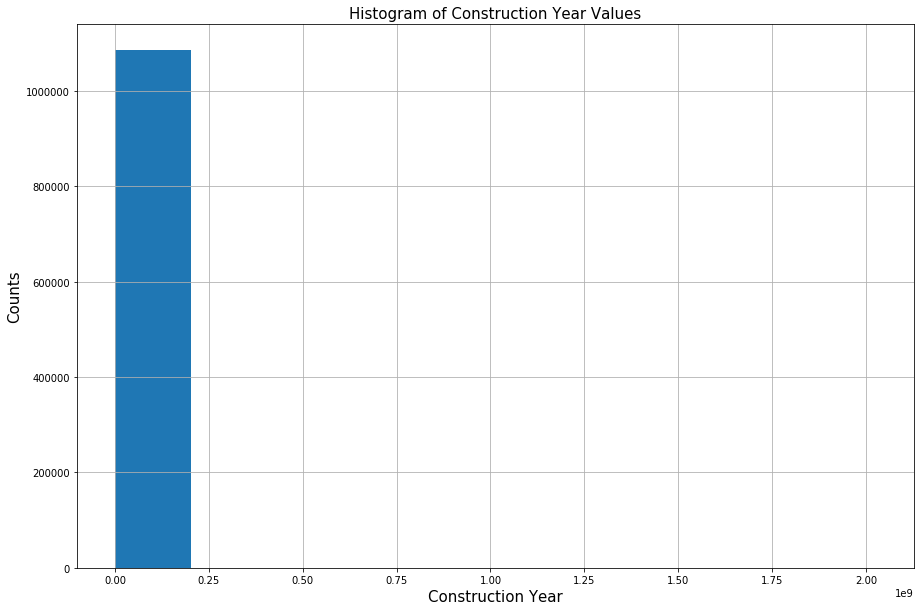

In [40]:
# making a histogram of our 'CNSTRCT_YR' column with 10 bins
building_footprints['CNSTRCT_YR'].hist(figsize=(15,10))
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Histogram of Construction Year Values', fontsize=15)

In [41]:
# printing the max and min values of our CNSTRCT_YR' column
print(building_footprints['CNSTRCT_YR'].max())
print(building_footprints['CNSTRCT_YR'].min())

2027140030.0
0.0


## 4.4 Identiyfying Values Not Between Years 1 and 2020

In [42]:
# previewing the first five rows of values not (i.e. ~) between 1 and 2020 in our data
building_footprints[~building_footprints['CNSTRCT_YR'].between(1, 2020)].head()

,NAME,CNSTRCT_YR,BIN,the_geom,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
50,NaN,0.0,3396049,MULTIPOLYGON (((-73.98260213243807 40.66219192...,12/07/2018 12:00:00 AM +0000,Constructed,1098656,64.34975,2100.0,153.0,5670.027484,339.330474,3011040032,3.011040e+09,Photogramm
74,NaN,0.0,3414373,MULTIPOLYGON (((-73.91785278999303 40.70463759...,12/07/2018 12:00:00 AM +0000,Constructed,1192063,11.01000,5110.0,56.0,153.309666,52.862130,3032490035,3.032490e+09,Photogramm
174,NaN,0.0,2098658,MULTIPOLYGON (((-73.88298274971864 40.81517278...,08/22/2017 12:00:00 AM +0000,Constructed,441521,18.40000,2100.0,23.0,1614.466219,176.130060,2027640025,2.027640e+09,Photogramm
936,NaN,0.0,4594704,MULTIPOLYGON (((-73.80705540401291 40.66400343...,08/22/2017 12:00:00 AM +0000,Constructed,367831,43.10980,2100.0,13.0,12451.758982,692.645592,4119000002,4.119000e+09,Other (Man
997,NaN,0.0,3209687,MULTIPOLYGON (((-73.94343801996024 40.62077805...,12/07/2018 12:00:00 AM +0000,Constructed,801244,27.16000,2100.0,24.0,857.225891,135.011032,3076500020,3.076500e+09,Photogramm


In [43]:
# printing the number of rows and columns of values in 'CNSTRCT_YR' column not between 1 and 2020
building_footprints[~building_footprints['CNSTRCT_YR'].between(1, 2020, inclusive=True)].shape

(6196, 15)

## 4.5 Replacing Values Not Between Years 1 and 2020 with the Median

In [44]:
# identifying values not between 1 and 2020 and saving as the name 'replace'
replace = building_footprints[~building_footprints['CNSTRCT_YR'].between(1, 2020)]
# replacing not between 1 and 2020 with the median as the name 'replacement_value'
replacement_value = building_footprints['CNSTRCT_YR'].median()

building_footprints[['CNSTRCT_YR']] = building_footprints[['CNSTRCT_YR']].replace(replace, replacement_value)

In [45]:
# previewing the first five rows of values not (i.e. ~) between 1 and 2020 in our data
building_footprints[~building_footprints['CNSTRCT_YR'].between(1, 2020)].head()

,NAME,CNSTRCT_YR,BIN,the_geom,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE


In [46]:
# printing the number of rows and columns of values in CNSTRCT_YR' column not between 1 and 2020
building_footprints[~building_footprints['CNSTRCT_YR'].between(1, 2020)].shape

(0, 15)

In [47]:
# printing descriptive statistics of our 'CNSTRCT_YR' column
building_footprints['CNSTRCT_YR'].describe()

count    1.085062e+06
mean     1.938925e+03
std      2.903546e+01
min      2.000000e+00
25%      1.920000e+03
50%      1.930000e+03
75%      1.955000e+03
max      2.020000e+03
Name: CNSTRCT_YR, dtype: float64

## 4.6 Plotting Histogram of Construction Years Between 1 and 2020

Text(0.5, 1.0, 'Histogram of Construction Year Values')

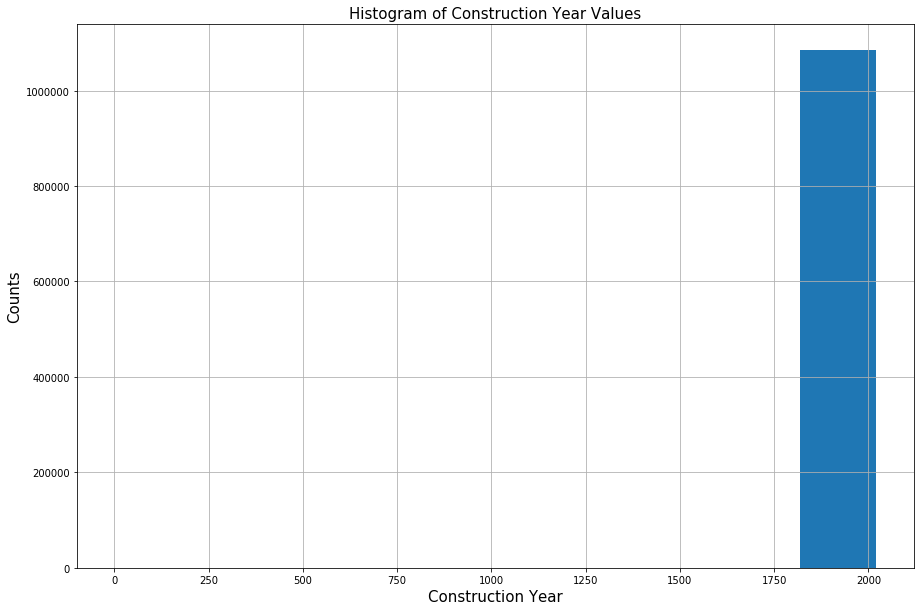

In [48]:
# making a histogram of our 'CNSTRCT_YR' column with 10 bins
building_footprints['CNSTRCT_YR'].hist(figsize=(15,10))
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Histogram of Construction Year Values', fontsize=15)

In [49]:
# printing the first 20 rows of our data sorted by the 'CNSTRCT_YR' column in ascending order
building_footprints.sort_values('CNSTRCT_YR').head(20)

,NAME,CNSTRCT_YR,BIN,the_geom,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
70598,NaN,2.0,3055217,MULTIPOLYGON (((-73.95653769904526 40.69124458...,06/19/2018 12:00:00 AM +0000,Constructed,1285166,NaN,2100.0,NaN,2437.184338,242.849442,3019270060,3.019270e+09,Other (Man
70377,NaN,20.0,2129340,MULTIPOLYGON (((-73.90758818710886 40.81335656...,12/20/2018 12:00:00 AM +0000,Constructed,1283871,NaN,2100.0,39.0,294.262231,73.002191,2026410034,2.026410e+09,Other (Man
1063939,NaN,190.0,1090898,MULTIPOLYGON (((-73.94613300522502 40.80422381...,01/16/2020 12:00:00 AM +0000,Split,1291850,56.920000,2100.0,24.0,1108.007982,150.945562,1017200014,1.017208e+09,Other (Man
1084608,NaN,202.0,4467030,MULTIPOLYGON (((-73.92782030992093 40.55560883...,01/30/2020 12:00:00 AM +0000,Constructed,1291982,25.000000,2100.0,7.0,1430.006313,162.000226,4163500400,NaN,Other (Man
1084958,NaN,202.0,4466340,MULTIPOLYGON (((-73.91965038239526 40.55660245...,02/27/2020 12:00:00 AM +0000,Constructed,1292183,26.000000,2100.0,9.0,860.001316,125.999919,4163500400,NaN,Other (Man
1060229,NaN,207.0,3413945,MULTIPOLYGON (((-73.99105552330545 40.66255555...,01/22/2019 12:00:00 AM +0000,Constructed,1282262,NaN,2100.0,97.0,1564.638130,181.112204,3008790017,3.008798e+09,Other (Man
1061684,NaN,208.0,4620030,MULTIPOLYGON (((-73.7955112596261 40.776652524...,12/05/2019 12:00:00 AM +0000,Constructed,1290850,25.000000,2100.0,89.0,2769.313716,218.043500,4057620048,4.057620e+09,Other (Man
62752,NaN,216.0,2129369,MULTIPOLYGON (((-73.89304883809278 40.85420693...,12/06/2018 12:00:00 AM +0000,Constructed,1287919,45.180000,2100.0,75.0,1757.728743,170.168805,2030500100,2.030500e+09,Other (Man
1080674,Pieter Claesen Wyckoff House,1652.0,3221967,MULTIPOLYGON (((-73.92083460429942 40.64439765...,01/28/2020 12:00:00 AM +0000,Constructed,550741,24.540000,2100.0,14.0,2214.189137,208.884085,3079170009,3.079170e+09,Photogramm
802687,Bowne House,1661.0,4113403,MULTIPOLYGON (((-73.8247828135812 40.762948467...,08/22/2017 12:00:00 AM +0000,Constructed,776399,26.120000,2100.0,64.0,2814.439349,242.381274,4050130006,4.050130e+09,Photogramm


## 4.7 Identifying Buildings Built Before 1652 - Possible Outliers

In [50]:
# returning the rows of which  the 'CNSTRCT_YR' is less than 1652
# I am using '1652' because this ism most likely the oldest building in this dataset 
building_footprints[building_footprints['CNSTRCT_YR'] < 1652]

,NAME,CNSTRCT_YR,BIN,the_geom,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
62752,NaN,216.0,2129369,MULTIPOLYGON (((-73.89304883809278 40.85420693...,12/06/2018 12:00:00 AM +0000,Constructed,1287919,45.18,2100.0,75.0,1757.728743,170.168805,2030500100,2.030500e+09,Other (Man
70377,NaN,20.0,2129340,MULTIPOLYGON (((-73.90758818710886 40.81335656...,12/20/2018 12:00:00 AM +0000,Constructed,1283871,NaN,2100.0,39.0,294.262231,73.002191,2026410034,2.026410e+09,Other (Man
70598,NaN,2.0,3055217,MULTIPOLYGON (((-73.95653769904526 40.69124458...,06/19/2018 12:00:00 AM +0000,Constructed,1285166,NaN,2100.0,NaN,2437.184338,242.849442,3019270060,3.019270e+09,Other (Man
1060229,NaN,207.0,3413945,MULTIPOLYGON (((-73.99105552330545 40.66255555...,01/22/2019 12:00:00 AM +0000,Constructed,1282262,NaN,2100.0,97.0,1564.638130,181.112204,3008790017,3.008798e+09,Other (Man
1061684,NaN,208.0,4620030,MULTIPOLYGON (((-73.7955112596261 40.776652524...,12/05/2019 12:00:00 AM +0000,Constructed,1290850,25.00,2100.0,89.0,2769.313716,218.043500,4057620048,4.057620e+09,Other (Man
1063939,NaN,190.0,1090898,MULTIPOLYGON (((-73.94613300522502 40.80422381...,01/16/2020 12:00:00 AM +0000,Split,1291850,56.92,2100.0,24.0,1108.007982,150.945562,1017200014,1.017208e+09,Other (Man
1084608,NaN,202.0,4467030,MULTIPOLYGON (((-73.92782030992093 40.55560883...,01/30/2020 12:00:00 AM +0000,Constructed,1291982,25.00,2100.0,7.0,1430.006313,162.000226,4163500400,NaN,Other (Man
1084958,NaN,202.0,4466340,MULTIPOLYGON (((-73.91965038239526 40.55660245...,02/27/2020 12:00:00 AM +0000,Constructed,1292183,26.00,2100.0,9.0,860.001316,125.999919,4163500400,NaN,Other (Man


In [51]:
# printing the median of the 'CNSTRCT_YR' column
building_footprints['CNSTRCT_YR'].median()

1930.0

## 4.8 Replacing Values Less Than 1652 with the Median

In [52]:
# identifying values less than 1652 to be replaced as the name 'replace'
replace = building_footprints[building_footprints['CNSTRCT_YR'] < 1652]
# saving the median as the name 'replacement_value' 
replacement_value = building_footprints['CNSTRCT_YR'].median()

# replacing these values with the column's median 
building_footprints[['CNSTRCT_YR']] = building_footprints[['CNSTRCT_YR']].replace(replace, replacement_value)

In [53]:
# performing a sanity check and looking at the first record (i.e. 62757) of our data and see if the old value
# of 216 has been replaced with 1930
building_footprints.loc[62757].head()

NAME                                                        NaN
CNSTRCT_YR                                                 2018
BIN                                                     3426517
the_geom      MULTIPOLYGON (((-73.88668604566068 40.67919850...
LSTMODDATE                         12/06/2018 12:00:00 AM +0000
Name: 62757, dtype: object

In [54]:
# printing the first 5 rows of our data sorted by the 'CNSTRCT_YR' column in ascending order
building_footprints.sort_values('CNSTRCT_YR').head()

,NAME,CNSTRCT_YR,BIN,the_geom,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
1080674,Pieter Claesen Wyckoff House,1652.0,3221967,MULTIPOLYGON (((-73.92083460429942 40.64439765...,01/28/2020 12:00:00 AM +0000,Constructed,550741,24.540000,2100.0,14.0,2214.189137,208.884085,3079170009,3.079170e+09,Photogramm
802687,Bowne House,1661.0,4113403,MULTIPOLYGON (((-73.8247828135812 40.762948467...,08/22/2017 12:00:00 AM +0000,Constructed,776399,26.120000,2100.0,64.0,2814.439349,242.381274,4050130006,4.050130e+09,Photogramm
483648,NaN,1661.0,4610542,MULTIPOLYGON (((-73.82449114078894 40.76279389...,08/17/2017 12:00:00 AM +0000,Constructed,1190137,14.846959,5110.0,63.0,571.057794,112.944873,4050130006,4.050130e+09,Photogramm
581969,NaN,1665.0,5042188,MULTIPOLYGON (((-74.06293248238293 40.61512359...,08/22/2017 12:00:00 AM +0000,Constructed,806241,22.260000,2100.0,21.0,2643.246683,249.017591,5028300049,5.028300e+09,Photogramm
965896,NaN,1665.0,5130548,MULTIPOLYGON (((-74.06383185277687 40.61463876...,08/22/2017 12:00:00 AM +0000,Constructed,160094,32.570000,2100.0,38.0,3580.967750,308.578271,5028300049,5.028300e+09,Photogramm


In [55]:
# printing the first 5 rows of our data sorted by the 'CNSTRCT_YR' column in descending order
building_footprints.sort_values('CNSTRCT_YR',ascending=False).head()

,NAME,CNSTRCT_YR,BIN,the_geom,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
1084722,NaN,2020.0,4614975,MULTIPOLYGON (((-73.78647396199194 40.59554273...,02/12/2020 12:00:00 AM +0000,Constructed,1292079,16.0,1004.0,8.0,2909.518869,215.769421,4160020001,NaN,Other (Man
1084655,NaN,2020.0,4617838,MULTIPOLYGON (((-73.90681394217023 40.77245906...,02/06/2020 12:00:00 AM +0000,Marked for Construction,1292028,40.0,5100.0,57.0,2270.125872,191.778607,4008050041,NaN,Other (Man
1084629,NaN,2020.0,4619932,MULTIPOLYGON (((-73.81187436336374 40.70348023...,02/05/2020 12:00:00 AM +0000,Constructed,1292014,30.0,2100.0,61.0,542.283212,92.247771,4096830013,NaN,Other (Man
1084948,NaN,2020.0,3343219,MULTIPOLYGON (((-73.96037381824159 40.67503941...,02/27/2020 12:00:00 AM +0000,Marked for Construction,1292182,50.0,5100.0,123.0,2014.739306,203.009981,3011620091,NaN,Other (Man
1084949,NaN,2020.0,3056434,MULTIPOLYGON (((-73.95743232613823 40.68629389...,02/27/2020 12:00:00 AM +0000,Marked for Construction,1292191,50.0,5100.0,64.0,1240.305772,165.431634,3019700048,NaN,Other (Man


## 4.9 Plotting Histogram of Construction Years with Cleaned Column

Text(0.5, 1.0, 'Histogram of Construction Year Values')

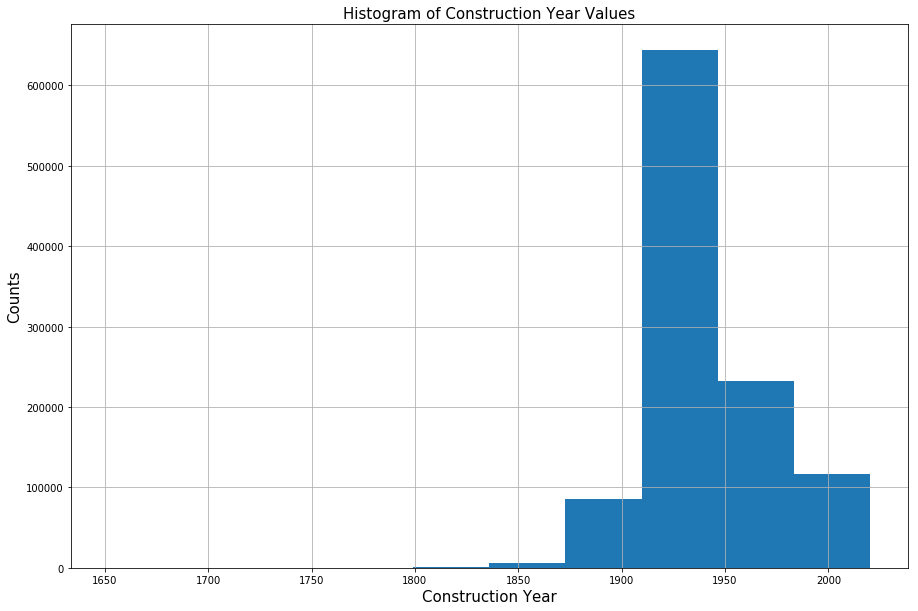

In [56]:
# making a histogram of our 'CNSTRCT_YR' column with 10 bins
building_footprints['CNSTRCT_YR'].hist(figsize=(15,10))
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Histogram of Construction Year Values', fontsize=15)

In [57]:
# printing descriptive statistics of our 'CNSTRCT_YR' column
building_footprints['CNSTRCT_YR'].describe()

count    1.085062e+06
mean     1.938938e+03
std      2.862806e+01
min      1.652000e+03
25%      1.920000e+03
50%      1.930000e+03
75%      1.955000e+03
max      2.020000e+03
Name: CNSTRCT_YR, dtype: float64

In [58]:
# return counts of unique values in descending order of our'CNSTRCT_YR' column
building_footprints['CNSTRCT_YR'].value_counts()

1920.0    131544
1930.0    124770
1925.0    109762
1950.0     63064
1910.0     53025
           ...  
1793.0         1
1795.0         1
1797.0         1
1809.0         1
1652.0         1
Name: CNSTRCT_YR, Length: 244, dtype: int64

In [59]:
# return counts of unique values of our 'CNSTRCT_YR' column sorted by 'CNSTRCT_YR'
building_footprints['CNSTRCT_YR'].value_counts().sort_index()

1652.0       1
1661.0       2
1665.0       2
1694.0       1
1706.0       2
          ... 
2016.0    1724
2017.0    1828
2018.0    1981
2019.0     689
2020.0      72
Name: CNSTRCT_YR, Length: 244, dtype: int64

In [60]:
# summing null/na values in our 'CNSTRCT_YR' column
building_footprints['CNSTRCT_YR'].isna().sum()

0

In [61]:
# printing descriptive statistics of our data 
building_footprints.describe()

,CNSTRCT_YR,BIN,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL
count,1.085062e+06,1.085062e+06,1.085062e+06,1.082446e+06,1.085052e+06,1.084541e+06,1.085062e+06,1.085062e+06,1.085062e+06,1.084752e+06
mean,1.938938e+03,3.709788e+06,5.904840e+05,2.753320e+01,2.698872e+03,5.510190e+01,1.596754e+03,1.553064e+02,3.561634e+09,3.561508e+09
std,2.862806e+01,1.026824e+06,3.589375e+05,2.125692e+01,1.202341e+03,4.150306e+01,5.605889e+03,1.271484e+02,9.861049e+08,9.861722e+08
min,1.652000e+03,1.000000e+06,1.000000e+00,0.000000e+00,0.000000e+00,-1.400000e+01,3.247526e+01,2.373699e+01,2.025280e+08,3.049330e+08
25%,1.920000e+03,3.128411e+06,2.863702e+05,1.832000e+01,2.100000e+03,2.500000e+01,6.520053e+02,1.096853e+02,3.043150e+09,3.043130e+09
50%,1.930000e+03,4.066612e+06,5.728845e+05,2.609000e+01,2.100000e+03,4.600000e+01,9.571781e+02,1.379126e+02,4.019100e+09,4.019050e+09
75%,1.955000e+03,4.481434e+06,8.609905e+05,3.109000e+01,2.100000e+03,7.400000e+01,1.320282e+03,1.644529e+02,4.106690e+09,4.106660e+09
max,2.020000e+03,5.863738e+06,1.292273e+06,1.550000e+03,5.110000e+03,5.560000e+02,1.171874e+06,2.001729e+04,6.000000e+09,6.000000e+09


In [62]:
# printing the null/na values of each column in our data
building_footprints.isna().sum()

NAME          1083395
CNSTRCT_YR          0
BIN                 0
the_geom            0
LSTMODDATE          0
LSTSTATYPE        180
DOITT_ID            0
HEIGHTROOF       2616
FEAT_CODE          10
GROUNDELEV        521
SHAPE_AREA          0
SHAPE_LEN           0
BASE_BBL            0
MPLUTO_BBL        310
GEOMSOURCE        214
dtype: int64

Text(0.5, 1.0, 'Histogram of Construction Year Values')

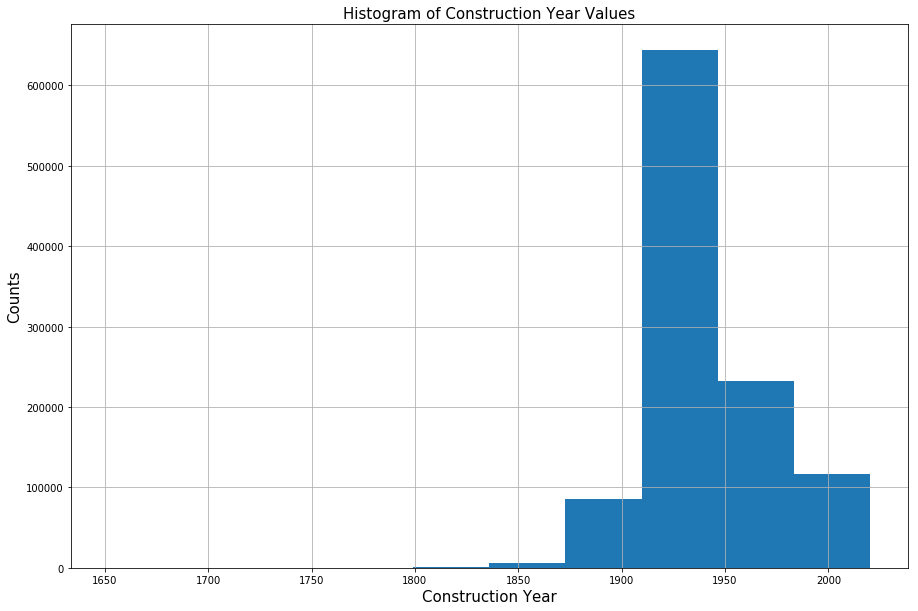

In [63]:
# making a histogram of our 'CNSTRCT_YR' column with 10 bins
building_footprints['CNSTRCT_YR'].hist(bins=10, figsize=(15,10))
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Histogram of Construction Year Values', fontsize=15)

Text(0.5, 1.0, 'Histogram of Construction Year Values')

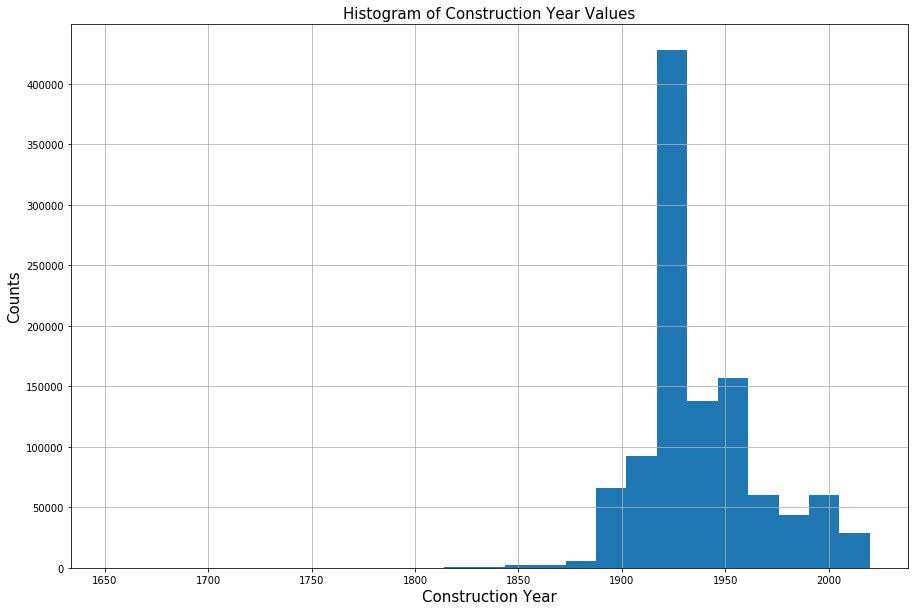

In [64]:
# making a histogram of our 'CNSTRCT_YR' column with 25 bins
building_footprints['CNSTRCT_YR'].hist(bins=25, figsize=(15,10))
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Histogram of Construction Year Values', fontsize=15)

Text(0.5, 1.0, 'Histogram of Construction Year Values')

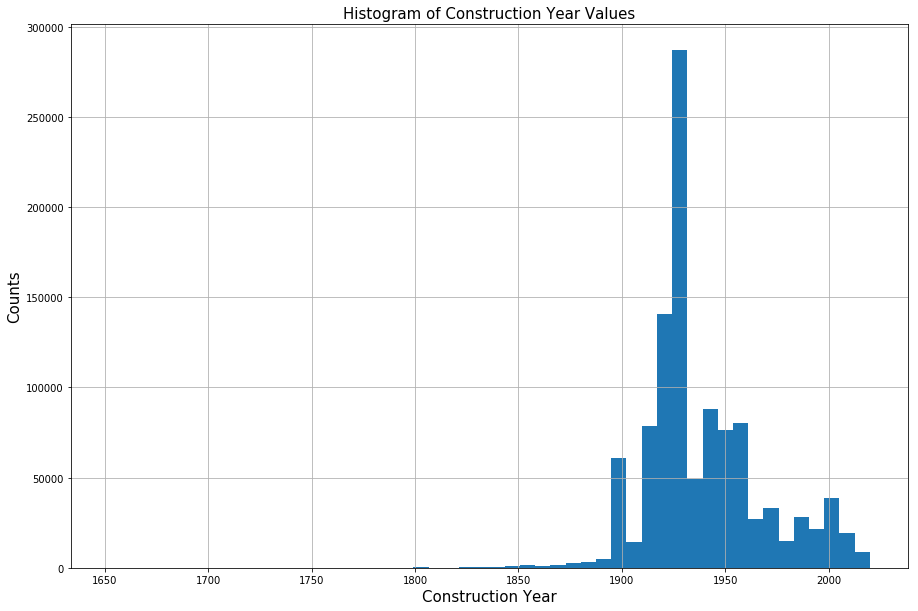

In [65]:
# making a histogram of our 'CNSTRCT_YR' column with 50 bins
building_footprints['CNSTRCT_YR'].hist(bins=50, figsize=(15,10))
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Histogram of Construction Year Values', fontsize=15)

In [66]:
# printing mean and median of our 'CNSTRCT_YR' column
print(building_footprints['CNSTRCT_YR'].mean())
print(building_footprints['CNSTRCT_YR'].median())

1938.938446835296
1930.0


# 5. Detecting Outliers

## 5.1 Making a Box Plot

### 5.1.1 Calculating Interquartile Range (IQR)

In [67]:
# printing the 25% and 75% quantiles of our 'CNSTRCT_YR' column
print(building_footprints['CNSTRCT_YR'].quantile(0.25))
print(building_footprints['CNSTRCT_YR'].quantile(0.75))

1920.0
1955.0


In [68]:
# saving the 25% (i.e. Q1) and 75% (i.e. Q3) quantiles of our 'CNSTRCT_YR' column
Q1 = building_footprints['CNSTRCT_YR'].quantile(0.25)
Q3 = building_footprints['CNSTRCT_YR'].quantile(0.75)

# Computing the interquartile range (IQR)
IQR = Q3 - Q1

In [69]:
# printing the IQR of our 'CNSTRCT_YR' column
IQR

35.0

In [70]:
# printing the lower 1.5*IQR whisker = Q1 - 1.5 * IQR
print((Q1 - 1.5 * IQR))

# printing the upper 1.5*IQR whisker = Q1 - 1.5 * IQR
print((Q3 + 1.5 * IQR))

1867.5
2007.5


### 5.1.2 Box Plot of Construction Year Values

Text(0.5, 1.0, 'Box Plot of Construction Year Value')

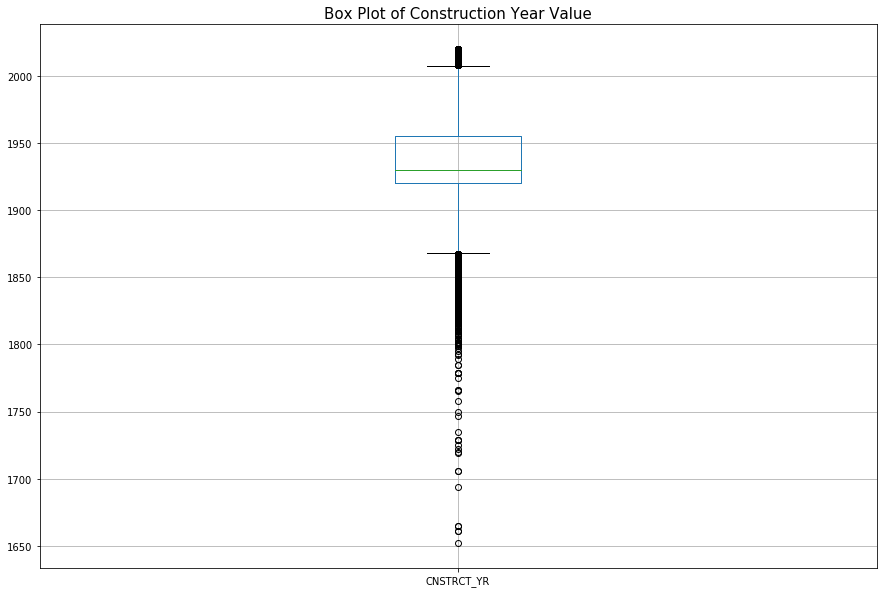

In [73]:
# making a box plot from our 'CNSTRCT_YR' column
CNSTRCT_YR_boxplot = building_footprints.boxplot(column=['CNSTRCT_YR'], figsize=(15,10))
plt.title('Box Plot of Construction Year Value', fontsize=15)

### 5.1.3 Making Histograms of Values Above and Below Box Plot Whiskers

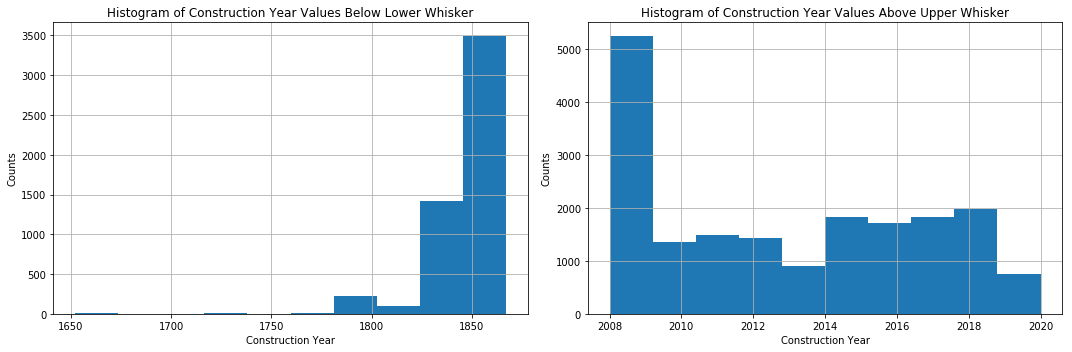

In [82]:
plt.figure(figsize=(15,5))

# identifying values lower than our lower whisker
floor = building_footprints[building_footprints.CNSTRCT_YR < (Q1 - 1.5 * IQR)] 

# identifying values higher than our upper whisker
ceiling = building_footprints[building_footprints.CNSTRCT_YR > (Q3 + 1.5 * IQR)]

#making histograms of these distributions
plt.subplot(121)
floor['CNSTRCT_YR'].hist()
plt.xlabel('Construction Year')
plt.ylabel('Counts')
plt.title('Histogram of Construction Year Values Below Lower Whisker')

plt.subplot(122)
ceiling['CNSTRCT_YR'].hist()
plt.xlabel('Construction Year')
plt.ylabel('Counts')
plt.title('Histogram of Construction Year Values Above Upper Whisker')

plt.tight_layout()

In [83]:
# return counts of unique values in descending order lower than our lower whisker
floor['CNSTRCT_YR'].value_counts()

1855.0    269
1850.0    260
1853.0    248
1854.0    241
1860.0    229
         ... 
1747.0      1
1694.0      1
1735.0      1
1797.0      1
1775.0      1
Name: CNSTRCT_YR, Length: 91, dtype: int64

In [84]:
# return counts of unique values lower than our lower whisker sorted by index (i.e. 'CNSTRCT_YR')
floor['CNSTRCT_YR'].value_counts().sort_index()

1652.0      1
1661.0      2
1665.0      2
1694.0      1
1706.0      2
         ... 
1863.0     67
1864.0    108
1865.0    141
1866.0    152
1867.0    174
Name: CNSTRCT_YR, Length: 91, dtype: int64

In [85]:
# printing the unique values lower than our lower whisker
floor['CNSTRCT_YR'].sort_values().unique()

array([1652., 1661., 1665., 1694., 1706., 1719., 1720., 1722., 1725.,
       1729., 1735., 1747., 1750., 1758., 1765., 1766., 1775., 1779.,
       1785., 1789., 1792., 1793., 1795., 1797., 1799., 1800., 1801.,
       1802., 1803., 1804., 1807., 1808., 1809., 1810., 1811., 1812.,
       1813., 1814., 1815., 1816., 1817., 1818., 1819., 1820., 1821.,
       1822., 1823., 1824., 1825., 1826., 1827., 1828., 1829., 1830.,
       1831., 1832., 1833., 1834., 1835., 1836., 1837., 1838., 1839.,
       1840., 1841., 1842., 1843., 1844., 1845., 1846., 1847., 1848.,
       1849., 1850., 1851., 1852., 1853., 1854., 1855., 1856., 1857.,
       1858., 1859., 1860., 1861., 1862., 1863., 1864., 1865., 1866.,
       1867.])

In [86]:
# return counts of unique values in descending order greater than our upper whisker
ceiling['CNSTRCT_YR'].value_counts()

2008.0    3291
2018.0    1981
2009.0    1955
2017.0    1828
2016.0    1724
2011.0    1488
2012.0    1428
2010.0    1366
2015.0    1006
2013.0     895
2014.0     825
2019.0     689
2020.0      72
Name: CNSTRCT_YR, dtype: int64

In [87]:
# previewing first five rows of our data
building_footprints.head()

,NAME,CNSTRCT_YR,BIN,the_geom,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,NaN,2009.0,3394646,MULTIPOLYGON (((-73.87129515296562 40.65717370...,08/22/2017 12:00:00 AM +0000,Constructed,1212853,21.608508,2100.0,18.0,854.662433,125.079796,3044520815,3.044521e+09,Photogramm
1,NaN,1930.0,4548330,MULTIPOLYGON (((-73.87670970144625 40.71425234...,08/17/2017 12:00:00 AM +0000,Constructed,1226227,10.360000,5110.0,122.0,217.594243,60.225858,4030640041,4.030640e+09,Photogramm
2,NaN,1960.0,4460479,MULTIPOLYGON (((-73.85195485799383 40.66235471...,08/22/2017 12:00:00 AM +0000,Constructed,581946,29.811570,2100.0,10.0,946.427476,123.141941,4139430001,4.139430e+09,Photogramm
3,NaN,1920.0,3355684,MULTIPOLYGON (((-73.94029215265738 40.64108287...,08/17/2017 12:00:00 AM +0000,Constructed,858061,11.200000,5110.0,32.0,248.678169,63.940817,3049720006,3.049720e+09,Photogramm
4,NaN,1915.0,3131737,MULTIPOLYGON (((-73.98998983552244 40.62383804...,08/22/2017 12:00:00 AM +0000,Constructed,568078,24.980000,2100.0,44.0,1163.227669,165.608763,3055100055,3.055100e+09,Photogramm


## 5.2. Z-Scores

### 5.2.1 Calculating Z-Scores

In [88]:
# calculating the z score of our 'CNSTRCT_YR' column
building_footprints['CNSTRCT_YR_zscore'] = (building_footprints.CNSTRCT_YR - building_footprints.CNSTRCT_YR.mean())/building_footprints.CNSTRCT_YR.std()

In [89]:
# making a separate dataframe with only the columns ['CNSTRCT_YR', 'CNSTRCT_YR_zscore']
CNSTRCT_YR_zscore = building_footprints[['CNSTRCT_YR', 'CNSTRCT_YR_zscore']]
CNSTRCT_YR_zscore.head()

,CNSTRCT_YR,CNSTRCT_YR_zscore
0,2009.0,2.447304
1,1930.0,-0.312227
2,1960.0,0.735696
3,1920.0,-0.661534
4,1915.0,-0.836188


In [90]:
# sorting by CNSTRCT_YR_zscore in ascending order
CNSTRCT_YR_zscore.sort_values(by='CNSTRCT_YR_zscore')

,CNSTRCT_YR,CNSTRCT_YR_zscore
1080674,1652.0,-10.022980
802687,1661.0,-9.708603
483648,1661.0,-9.708603
581969,1665.0,-9.568880
965896,1665.0,-9.568880
...,...,...
1084950,2020.0,2.831542
1084949,2020.0,2.831542
1084948,2020.0,2.831542
1084750,2020.0,2.831542


In [91]:
# sorting by CNSTRCT_YR_zscore in descending order
CNSTRCT_YR_zscore.sort_values(by='CNSTRCT_YR_zscore', ascending=False)

,CNSTRCT_YR,CNSTRCT_YR_zscore
1084722,2020.0,2.831542
1084655,2020.0,2.831542
1084629,2020.0,2.831542
1084948,2020.0,2.831542
1084949,2020.0,2.831542
...,...,...
581969,1665.0,-9.568880
965896,1665.0,-9.568880
483648,1661.0,-9.708603
802687,1661.0,-9.708603


In [92]:
len(CNSTRCT_YR_zscore)

1085062

In [93]:
CNSTRCT_YR_zscore.dtypes

CNSTRCT_YR           float64
CNSTRCT_YR_zscore    float64
dtype: object

### 5.2.2 Identifying Possible Outliers from Z-Score

In [94]:
# returning values in 'CNSTRCT_YR_zscore' column not between -3 and 3
outside_zscore = CNSTRCT_YR_zscore[~CNSTRCT_YR_zscore['CNSTRCT_YR_zscore'].between(-3, 3, inclusive=True)]

In [95]:
# previewing first five rows 
outside_zscore.head()

,CNSTRCT_YR,CNSTRCT_YR_zscore
3249,1843.0,-3.351203
6672,1850.0,-3.106688
8437,1853.0,-3.001896
9206,1850.0,-3.106688
11136,1850.0,-3.106688


In [96]:
# previewing first five rows 
outside_zscore.head()

,CNSTRCT_YR,CNSTRCT_YR_zscore
3249,1843.0,-3.351203
6672,1850.0,-3.106688
8437,1853.0,-3.001896
9206,1850.0,-3.106688
11136,1850.0,-3.106688


In [97]:
# sorting values in 'CNSTRCT_YR_zscore' in ascending order
outside_zscore.sort_values(by='CNSTRCT_YR_zscore')

,CNSTRCT_YR,CNSTRCT_YR_zscore
1080674,1652.0,-10.022980
483648,1661.0,-9.708603
802687,1661.0,-9.708603
965896,1665.0,-9.568880
581969,1665.0,-9.568880
...,...,...
1067421,1853.0,-3.001896
1067461,1853.0,-3.001896
1079567,1853.0,-3.001896
1080022,1853.0,-3.001896


In [98]:
# sorting values in 'CNSTRCT_YR_zscore' in descending order
outside_zscore.sort_values(by='CNSTRCT_YR_zscore', ascending=False)

,CNSTRCT_YR,CNSTRCT_YR_zscore
1067421,1853.0,-3.001896
1080929,1853.0,-3.001896
1066303,1853.0,-3.001896
1066426,1853.0,-3.001896
1083979,1853.0,-3.001896
...,...,...
581969,1665.0,-9.568880
965896,1665.0,-9.568880
802687,1661.0,-9.708603
483648,1661.0,-9.708603


In [99]:
# printing number of rows
len(outside_zscore)

3173

### 5.2.3 Making Histograms of Construction Year Raw and Normalized (Z-Score) Values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11427d748>,
      dtype=object)

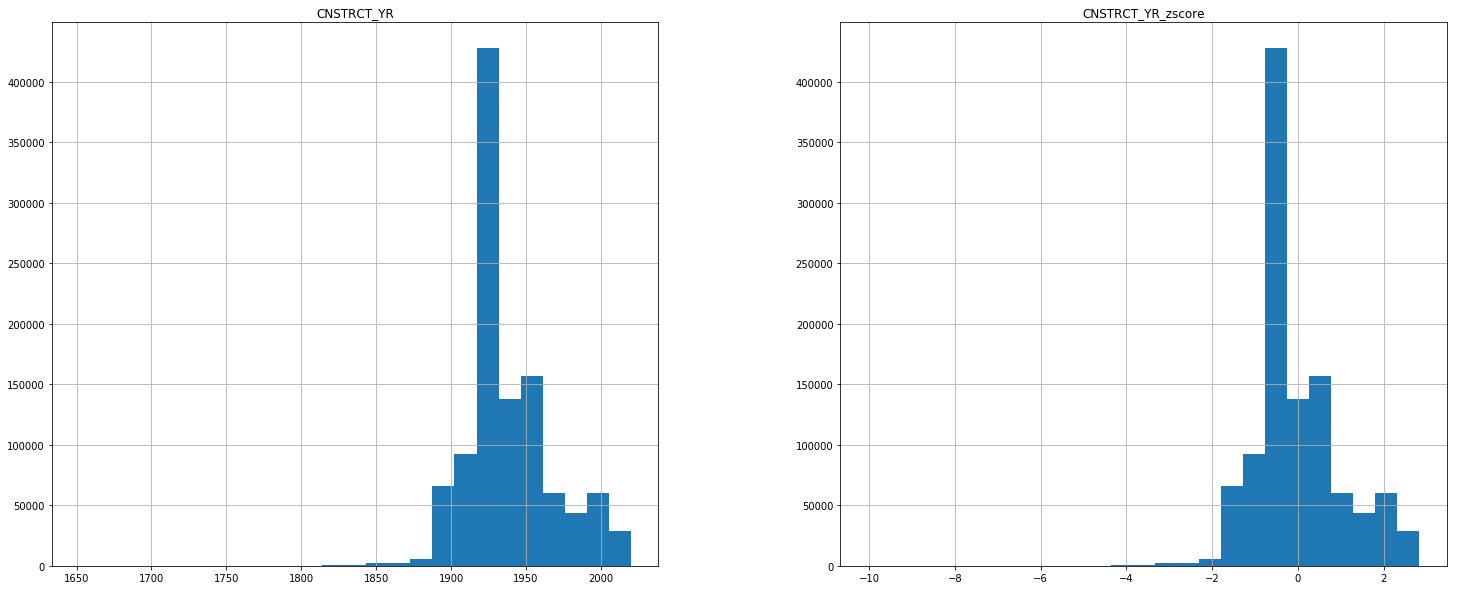

In [100]:
# making histograms of the distributions of both columns
CNSTRCT_YR_zscore.hist(bins=25, figsize=(25,10))

In [101]:
# previewing the first five rows of entire dataframe
building_footprints.head()

,NAME,CNSTRCT_YR,BIN,the_geom,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,CNSTRCT_YR_zscore
0,NaN,2009.0,3394646,MULTIPOLYGON (((-73.87129515296562 40.65717370...,08/22/2017 12:00:00 AM +0000,Constructed,1212853,21.608508,2100.0,18.0,854.662433,125.079796,3044520815,3.044521e+09,Photogramm,2.447304
1,NaN,1930.0,4548330,MULTIPOLYGON (((-73.87670970144625 40.71425234...,08/17/2017 12:00:00 AM +0000,Constructed,1226227,10.360000,5110.0,122.0,217.594243,60.225858,4030640041,4.030640e+09,Photogramm,-0.312227
2,NaN,1960.0,4460479,MULTIPOLYGON (((-73.85195485799383 40.66235471...,08/22/2017 12:00:00 AM +0000,Constructed,581946,29.811570,2100.0,10.0,946.427476,123.141941,4139430001,4.139430e+09,Photogramm,0.735696
3,NaN,1920.0,3355684,MULTIPOLYGON (((-73.94029215265738 40.64108287...,08/17/2017 12:00:00 AM +0000,Constructed,858061,11.200000,5110.0,32.0,248.678169,63.940817,3049720006,3.049720e+09,Photogramm,-0.661534
4,NaN,1915.0,3131737,MULTIPOLYGON (((-73.98998983552244 40.62383804...,08/22/2017 12:00:00 AM +0000,Constructed,568078,24.980000,2100.0,44.0,1163.227669,165.608763,3055100055,3.055100e+09,Photogramm,-0.836188


In [102]:
# previewing the last five rows of entire dataframe
building_footprints.tail()

,NAME,CNSTRCT_YR,BIN,the_geom,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,CNSTRCT_YR_zscore
1085057,NaN,1951.0,4608296,MULTIPOLYGON (((-73.93321957185307 40.73013925...,03/06/2020 12:00:00 AM +0000,Alteration,1209560,13.40324,1004.0,24.0,1403.853389,163.005024,4003120348,4.003120e+09,Other (Man,0.421319
1085058,NaN,2016.0,4607807,MULTIPOLYGON (((-73.92112358997674 40.55679314...,03/04/2020 12:00:00 AM +0000,Constructed,1292251,26.00000,2100.0,8.0,849.252330,125.500224,4163500400,NaN,Other (Man,2.691819
1085059,NaN,2015.0,4466437,MULTIPOLYGON (((-73.92114969449588 40.55671140...,03/04/2020 12:00:00 AM +0000,Constructed,1292252,25.00000,2100.0,8.0,859.993341,125.999463,4163500400,NaN,Other (Man,2.656888
1085060,NaN,2017.0,4465580,MULTIPOLYGON (((-73.92156701336474 40.55676926...,03/04/2020 12:00:00 AM +0000,Constructed,1292253,26.00000,2100.0,8.0,1131.626609,141.272065,4163500400,NaN,Other (Man,2.726750
1085061,NaN,2016.0,4466806,MULTIPOLYGON (((-73.9212000772377 40.556549572...,03/04/2020 12:00:00 AM +0000,Constructed,1292254,31.00000,2100.0,8.0,1118.008151,138.000417,4163500400,NaN,Other (Man,2.691819


In [103]:
# printing the dimensions (i.e. rows, columns) of entire dataframe
building_footprints.shape

(1085062, 16)

# 6. Conclusion

In this notebook, we reviewed various ways to inspect, clean, wrangle, and detect any outliers in your data.  Specifically, we focused on ways to inspect the shape (number of rows, columns) of your data, fill in or replace incorrect values with the median, and detect outliers with box plots and z-scores. This step is crucial if you are interested in modeling or predicting future values.. In Part III, we will focus on data visualization.